#Tentang Dataset
##Analisis distribusi harga rumah untuk memahami tren pasar dan mengidentifikasi peluang investasi potensial.

https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market

Kumpulan data ini berisi harga rumah di New York, yang memberikan wawasan berharga mengenai pasar real estate di wilayah tersebut. Ini mencakup informasi seperti nama broker, tipe rumah, harga, jumlah kamar tidur dan kamar mandi, luas properti, alamat, negara bagian, wilayah administratif dan lokal, nama jalan, dan koordinat geografis.


*   BROKERTITLE: Title of the broker
*   TYPE: Type of the house
*   PRICE: Price of the house
*   BEDS: Number of bedrooms
*   BATH: Number of bathrooms
*   PROPERTYSQFT: Square footage of the property
*   ADDRESS: Full address of the house
*   STATE: State of the house
*   MAIN_ADDRESS: Main address information
*   ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
*   LOCALITY: Locality information
*   SUBLOCALITY: Sublocality information
*   STREET_NAME: Street name
*   LONG_NAME: Long name
*   FORMATTED_ADDRESS: Formatted address
*   LATITUDE: Latitude coordinate of the house
*   LONGITUDE: Longitude coordinate of the house

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

#Load Data

In [3]:
pd.set_option('display.max_column',50)
path = ('/content/drive/MyDrive/Colab Notebooks/Final Project/DS 23B_Dzulqisan Maulana_Progress Final Project (Drive)/NY-House-Dataset.csv')
df = pd.read_csv(path)

#  Preliminary Look and Data Cleansing

## Sample of data

In [4]:
# Showing top 5 rows of the data
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761,-73.974
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766,-73.981
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.542,-74.196
3,Brokered by COMPASS,Condo for sale,69000,3,1,445,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761,-73.975
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.374,14175,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767,-73.970


In [5]:
# sample 10 rows of the data
# the results change everytime the code is executed (random sample)
df.sample(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
1610,Brokered by COMPASS,Condo for sale,1100000,2,1,807,170 Broadway Apt 6A,"Brooklyn, NY 11211","170 Broadway Apt 6ABrooklyn, NY 11211",New York,Kings County,Brooklyn,Southside,170,"170 Broadway #6a, Brooklyn, NY 11211, USA",40.710,-73.963
163,Brokered by RE MAX Edge,House for sale,2800000,4,6,8333,25 Copperleaf Ter,"Staten Island, NY 10304","25 Copperleaf TerStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Copperleaf Terrace,"25 Copperleaf Terrace, Staten Island, NY 10304...",40.586,-74.108
3285,"Brokered by Robert Defalco Realty, Inc.",House for sale,749999,4,2.374,1063,4236 Richmond Ave,"Staten Island, NY 10312","4236 Richmond AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Richmond Avenue,"4236 Richmond Ave, Staten Island, NY 10312, USA",40.536,-74.157
422,Brokered by 5 Boro Realty Corp,Land for sale,799999,3,2.374,2184.208,1905 Fulton St,"Bedford Stuyvesant, NY 11233","1905 Fulton StBedford Stuyvesant, NY 11233",United States,New York,Kings County,Brooklyn,Fulton Street,"1905 Fulton St, Brooklyn, NY 11233, USA",40.679,-73.920
1404,Brokered by Prominent Properties Sotheby's Int...,House for sale,499999,3,2,1763,12 Irving Pl,"Staten Island, NY 10304","12 Irving PlStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Irving Place,"12 Irving Pl, Staten Island, NY 10304, USA",40.618,-74.086
3461,Brokered by Douglas Elliman - Bayside,House for sale,875000,4,2,1600,2420 Cortelyou Rd,"Brooklyn, NY 11226","2420 Cortelyou RdBrooklyn, NY 11226",United States,New York,Kings County,Brooklyn,Cortelyou Road,"2420 Cortelyou Rd, Brooklyn, NY 11226, USA",40.644,-73.954
3907,Brokered by Reliable Sell & Buy Realty Inc,Co-op for sale,473000,2,1,1000,150 W End Ave Apt 5H,"Brooklyn, NY 11235","150 W End Ave Apt 5HBrooklyn, NY 11235",New York,Kings County,Brooklyn,Manhattan Beach,150,"150 West End Ave #5h, Brooklyn, NY 11235, USA",40.578,-73.953
4245,Brokered by Douglas Elliman - 936 Broadway,Condo for sale,925000,2,2,787,1904 Harman St Apt 4A,"Queens, NY 11385","1904 Harman St Apt 4AQueens, NY 11385",New York,Queens County,Queens,Ridgewood,1904,"1904 Harman St #4a, Ridgewood, NY 11385, USA",40.708,-73.911
1313,Brokered by Keller Williams NYC,Co-op for sale,200000,1,1,2184.208,86-16 60th Ave Unit 2N,"Queens, NY 11373","86-16 60th Ave Unit 2NQueens, NY 11373",New York,Queens County,Queens,Elmhurst,8616,"8616 60th Ave Apt 2n, Elmhurst, NY 11373, USA",40.730,-73.874
2302,Brokered by RE/MAX Team,Co-op for sale,189000,3,1,2184.208,90-11 35 Ave Unit 1H,"Jackson Heights, NY 11372","90-11 35 Ave Unit 1HJackson Heights, NY 11372",New York,Queens County,Queens,Jackson Heights,9011,"9011 35th Ave Apt 1f, Jackson Heights, NY 1137...",40.753,-73.877


Observations:
1. Terdapat 6 kolom numerik dan 11 kolom kategorik
2. Terdapat konten di kolom `LOCALITY` yang masuk ke dalam kolom `ADMINISTRATIVE_AREA_LEVEL_2`,`SUBLOCALITY`,`STREET_NAME`

## General Information & Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

Observation:
1. Data contains 17 columns with 4801 rows
2. Most of the columns have values
3. All dtypes seem OK (appropriate), kecuali kolom `BATH` harus di ganti menjadi dtypes integer

In [7]:
#Mengubah tipe data BATH dari float menjadi integer
df['BATH'] = df['BATH'].astype('int')

In [8]:
# number of missing values per column
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

Observation:

* There is no missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   int64  
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

Observation:
* Success changing dtype!

## Duplicated data check

In [10]:
# number of duplicated data
df.duplicated().sum()

214

There are 214 duplicated rows; will be dropped later.

In [11]:
# sample duplicated rows
df[df.duplicated(keep=False)].sort_values('PRICE').head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
3415,Brokered by BESMATCH REAL ESTATE,Co-op for sale,99000,1,1,850,1185 Anderson Ave Apt 2C,"Bronx, NY 10452","1185 Anderson Ave Apt 2CBronx, NY 10452",New York,Bronx County,The Bronx,Highbridge,1185,"1185 Anderson Ave #2c, Bronx, NY 10452, USA",40.837,-73.924
3412,Brokered by BESMATCH REAL ESTATE,Co-op for sale,99000,1,1,850,1185 Anderson Ave Apt 2C,"Bronx, NY 10452","1185 Anderson Ave Apt 2CBronx, NY 10452",New York,Bronx County,The Bronx,Highbridge,1185,"1185 Anderson Ave #2c, Bronx, NY 10452, USA",40.837,-73.924
3625,Brokered by CENTURY 21 Milestone Realty,Co-op for sale,119000,3,1,2184.208,89-00 170 St Unit 11N,"Jamaica, NY 11432","89-00 170 St Unit 11NJamaica, NY 11432",New York,Queens County,Queens,Jamaica,8900,"8900 170th St Apt 11l, Jamaica, NY 11432, USA",40.710,-73.791
3615,Brokered by CENTURY 21 Milestone Realty,Co-op for sale,119000,3,1,2184.208,89-00 170 St Unit 11N,"Jamaica, NY 11432","89-00 170 St Unit 11NJamaica, NY 11432",New York,Queens County,Queens,Jamaica,8900,"8900 170th St Apt 11l, Jamaica, NY 11432, USA",40.710,-73.791
1400,Brokered by Corcoran,Co-op for sale,129000,3,1,2184.208,87-15 165th St Unit 2A,"Jamaica, NY 11432","87-15 165th St Unit 2AJamaica, NY 11432",New York,Queens County,Queens,Jamaica,87-15,"87-15 165th St #2a, Jamaica, NY 11432, USA",40.710,-73.798
1408,Brokered by Corcoran,Co-op for sale,129000,3,1,2184.208,87-15 165th St Unit 2A,"Jamaica, NY 11432","87-15 165th St Unit 2AJamaica, NY 11432",New York,Queens County,Queens,Jamaica,87-15,"87-15 165th St #2a, Jamaica, NY 11432, USA",40.710,-73.798
3743,Brokered by Brown Harris Stevens- 3531 Johnson...,Co-op for sale,165000,1,1,750,5614 Netherland Ave Apt 4B,"Bronx, NY 10471","5614 Netherland Ave Apt 4BBronx, NY 10471",New York,Bronx County,The Bronx,North Riverdale,5614,"5614 Netherland Ave #4b, Bronx, NY 10471, USA",40.905,-73.906
3725,Brokered by Brown Harris Stevens- 3531 Johnson...,Co-op for sale,165000,1,1,750,5614 Netherland Ave Apt 4B,"Bronx, NY 10471","5614 Netherland Ave Apt 4BBronx, NY 10471",New York,Bronx County,The Bronx,North Riverdale,5614,"5614 Netherland Ave #4b, Bronx, NY 10471, USA",40.905,-73.906
1560,Brokered by Flat Rate Realty Of Queens Ltd,Co-op for sale,169000,1,1,850,165-20 Highland Ave Unit 105,"Jamaica, NY 11432","165-20 Highland Ave Unit 105Jamaica, NY 11432",New York,Queens County,Queens,Jamaica,16520,"16520 Highland Ave Apt 105, Jamaica, NY 11432,...",40.711,-73.799
1555,Brokered by Flat Rate Realty Of Queens Ltd,Co-op for sale,169000,1,1,850,165-20 Highland Ave Unit 105,"Jamaica, NY 11432","165-20 Highland Ave Unit 105Jamaica, NY 11432",New York,Queens County,Queens,Jamaica,16520,"16520 Highland Ave Apt 105, Jamaica, NY 11432,...",40.711,-73.799


### Drop duplicated rows

In [12]:
# drop duplicated rows
df = df.drop_duplicates()

In [13]:
# sanity check
df.duplicated().sum()

0

Observation:
* Good good! Duplicated rows have gone
* Data sudah bersih

#EDA

## Data understanding

### Statistical summary

In [14]:
# group column names based on type
categoricals = ['BROKERTITLE',
                'TYPE',
                'ADDRESS',
                'STATE',
                'MAIN_ADDRESS',
                'ADMINISTRATIVE_AREA_LEVEL_2',
                'LOCALITY',
                'SUBLOCALITY',
                'STREET_NAME',
                'LONG_NAME',
                'FORMATTED_ADDRESS'
]

numericals = ['PRICE',
              'BEDS',
              'BATH',
              'PROPERTYSQFT',
              'LATITUDE',
              'LONGITUDE'
]

In [15]:
# numerical statistical sumary
df[numericals].describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4587,4587,4587,4587,4587,4587
mean,2381171.682,3.366,2.354,2177.712,40.714,-73.942
std,32068307.751,2.629,1.971,2283.096,0.088,0.101
min,2494,1,0,230,40.500,-74.253
25%,499000,2,1,1200,40.639,-73.987
50%,825000,3,2,2184.208,40.727,-73.949
75%,1498500,4,3,2184.208,40.772,-73.869
max,2147483647,50,50,65535,40.913,-73.702


Observation:
* Overall, the minimum and maximum values imbalance for each column

In [16]:
#group data numerical yang akan di olah
cols = ['PRICE','BEDS','BATH','PROPERTYSQFT']

In [17]:
# describe method on categorical data
df[categoricals].describe()

,BROKERTITLE,TYPE,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS
count,4587,4587,4587,4587,4587,4587,4587,4587,4587,4587,4587
unique,1036,13,4582,308,4583,29,11,21,174,2731,4550
top,Brokered by COMPASS,Co-op for sale,310-312 Hillside Ave,"Brooklyn, NY 11235","310-312 Hillside AveStaten Island, NY 10304",United States,New York,New York,Manhattan,2,"67-66 108th St, Forest Hills, NY 11375, USA"
freq,435,1388,2,99,2,2374,2395,967,930,19,3


In [18]:
# showing the precise value counts
cats = ['BROKERTITLE','TYPE', 'LOCALITY','ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY','STREET_NAME']
for col in cats:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of BROKERTITLE column
Brokered by COMPASS                                                                        435
Brokered by Douglas Elliman - 575 Madison Ave                                              109
Brokered by Brown Harris Stevens                                                            93
Brokered by Corcoran East Side                                                              86
Brokered by RE MAX Edge                                                                     75
Brokered by Winzone Realty Inc                                                              64
Brokered by Sotheby's International Realty - East Side Manhattan Brokerage                  59
Brokered by E Realty International Corp                                                     58
Brokered by Serhant                                                                         49
Brokered by RE MAX Real Estate Professionals                                                48
Brokered by Exp

Observations:
* `LOCALOTY` have 11 unique value.
* Terdapat value `LOCALITY` yang berada di kolom `ADMINISTRATIVE_AREA_LEVEL_2`,`SUBLOCALITY`,`STREET_NAME`
* `TYPE` have 13 unique value.

####Data manipulation

#####Manipulasi data dari kolom `LOCALITY`

In [19]:
#menyalin data untuk di manipulasi
df_locality_c = df.copy()

In [20]:
#membuat kolom baru dari LOCALITY menjadi LOCAL
fix_list_sn = ['New York County','Queens County','Kings County','Bronx County','Richmond County','The Bronx'] #data yang harus di pindahkan dari STREET_NAME
fix_list_sl = ['New York County','Queens County','Kings County','Bronx County','Richmond County','Manhattan'] #data yang harus di pindahkan dari SUBLOCALITY
new_locality = [] #data yangsudah di pindahkan
panjang_sn = len(df_locality_c['STREET_NAME']) #panjang data
df_street_name = df_locality_c['STREET_NAME'] #variabel data dari kolom STREE_NAME
df_sublocality = df_locality_c['SUBLOCALITY'] #variabel data dari kolom SUBLOCALITY
df_locality = df_locality_c['LOCALITY'] #variabel data dari kolom LOCALITY
for row in range(panjang_sn): #looping panjang data
  if str(df_street_name.iloc[row]) in fix_list_sn: #syarat pertama yang ingin di ambil kontennya
    if str(df_street_name.iloc[row]) == 'The Bronx': #1 harus sesuai kriteria The Bronx
      new_locality.append('Bronx County') #taruh konten di new_locality sebagai Bronx County
    else:
      new_locality.append(df_street_name.iloc[row]) #taruh konten di new_locality dan ambil nilai dari kolom STREET_NAME
  elif str(df_sublocality.iloc[row]) in fix_list_sl: #syarat kedua yang ingin di ambil kontennya
    if str(df_sublocality.iloc[row]) == 'Manhattan': #1 harus sesuai kriteria Manhattan
      new_locality.append('New York County') #taruh konten di new_locality sebagai New york County
    else:
      new_locality.append(df_sublocality.iloc[row]) #taruh konten di new_locality dan ambil nilai dari kolom SUBLOCALITY
  elif str(df_locality.iloc[row]) == 'Queens': #syarat ketiga yang ingin di ambil kontennya
    new_locality.append('Queens County') #taruh konten di new_locality sebagai Queens County
  elif str(df_locality.iloc[row]) == 'The Bronx': #syarat keempat yang ingin di ambil kontennya
    new_locality.append('Bronx County') #taruh konten di new_locality sebagai Bronx County
  elif str(df_locality.iloc[row]) == 'Brooklyn' or str(df_locality.iloc[row]) == 'Flatbush': #syarat kelima yang ingin di ambil kontennya
    new_locality.append('Kings County') #taruh konten di new_locality sebagai Kings County
  else: #jika semua syarat tidak terpenuhi maka ambil konten ini
    new_locality.append(df_locality.iloc[row]) #taruh konten di new_locality dan ambil nilai dari kolom LOCALITY
#buat kolom baru
df_locality_c.insert(11,'LOCAL',new_locality) #membuat kolom baru yang bernama LOCAL
print('Done')

Done


In [21]:
#recheck data yang kolom LOCAL yang sudah di manipulasi
df_locality_c['LOCAL'].value_counts()

New York County    1228
Queens County      1200
Kings County       1159
Richmond County     528
Bronx County        472
Name: LOCAL, dtype: int64

#####Manipulasi data dari kolom `TYPE`

In [22]:
#menyalin data untuk memanipulasi data dari kolom TYPE
df_type = df_locality_c.copy()

In [23]:
apartment = ['Condo for sale','Condop for sale'] #data yang ingin di ubah
house = ['Mobile house for sale','House for sale'] #data yang ingin di ubah
new_type = [] #data list kosong
panjang = len(df_type['TYPE']) #pangjang data
df_tp = df_type['TYPE'] #variabel data dari kolom TYPE
for row in range(panjang) : #looping panjang data
  if str(df_tp.iloc[row]) in apartment : #syarat pertama jika nilai terdapat di variabel apartment
    new_type.append('Apartment') #tambahkan data di list new_type dan ubah konten jadi Apartment
  elif str(df_tp.iloc[row]) in house : #syarat kedua jika nilai terdapat di variabel house
    new_type.append('House') #tambahkan data di list new_type dan ubah konten jadi House
  elif str(df_tp.iloc[row]) == 'Co-op for sale' : #syarat ketiga jika konten terdapat  Co-op for sale
    new_type.append('Co-op') #tambahkan data di list new_type dan ubah konten jadi Co-op
  elif str(df_tp.iloc[row]) == 'Multi-family home for sale' : #syarat keempat jika konten terdapat  Multi-family home for sale
    new_type.append('Multi-family home') #tambahkan data di list new_type dan ubah konten jadi Multi-family home
  elif str(df_tp.iloc[row]) == 'Townhouse for sale' : #syarat kelima jika konten terdapat  Co-op for sale
    new_type.append('Townhouse') #tambahkan data di list new_type dan ubah konten jadi Townhouse
  elif str(df_tp.iloc[row]) == 'Land for sale' : #syarat keenam jika konten terdapat  Co-op for sale
    new_type.append('Land') #tambahkan data di list new_type dan ubah konten jadi land
  else:
    new_type.append(df_tp.iloc[row]) #tambahkan data di list new_type dengan data default
#buat kolom baru
df_type['TYPE'] = new_type #merubah konten kolom TYPE
print('Done')


Done


In [24]:
df_type['TYPE'].value_counts()

Co-op                1388
House                 967
Apartment             846
Multi-family home     699
Townhouse             288
Pending               229
Contingent             87
Land                   47
For sale               20
Foreclosure            14
Coming Soon             2
Name: TYPE, dtype: int64

Observations:
* Terdapat 2 nilai yang tidak termasuk tipe rumah `For sale`,`Coming soon`
* Dari 2 katergori tersebut ada 20 baris

In [25]:
#menghitung nilai yang ingin di drop
#simple code
#20*100/df_type.shape[0]
#intermediate code :D
df_type[df_type['TYPE'].isin(['For sale','Coming Soon'])].shape[0] * 100 /df_type.shape[0]


0.47961630695443647

Observations:
* Dari kategori `For sale`,`Coming soon` hanya 0,47 % atau kurang dari 5 %, maka akan di drop

In [26]:
df_type[~df_type['TYPE'].isin(['For sale','Coming Soon'])].shape

(4565, 18)

In [27]:
#drop kolom TYPE yang berada nilai For sale dan Coming Soon
df_type = df_type[~df_type['TYPE'].isin(['For sale','Coming Soon'])]
#menghitung nilai yang di kolom TYPE
df_type['TYPE'].value_counts()

Co-op                1388
House                 967
Apartment             846
Multi-family home     699
Townhouse             288
Pending               229
Contingent             87
Land                   47
Foreclosure            14
Name: TYPE, dtype: int64

## Univariate Analysis

### Boxplot to detect outliers

In [28]:
#remember the Dataset
df_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4565 entries, 0 to 4800
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4565 non-null   object 
 1   TYPE                         4565 non-null   object 
 2   PRICE                        4565 non-null   int64  
 3   BEDS                         4565 non-null   int64  
 4   BATH                         4565 non-null   int64  
 5   PROPERTYSQFT                 4565 non-null   float64
 6   ADDRESS                      4565 non-null   object 
 7   STATE                        4565 non-null   object 
 8   MAIN_ADDRESS                 4565 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4565 non-null   object 
 10  LOCALITY                     4565 non-null   object 
 11  LOCAL                        4565 non-null   object 
 12  SUBLOCALITY                  4565 non-null   object 
 13  STREET_NAME       

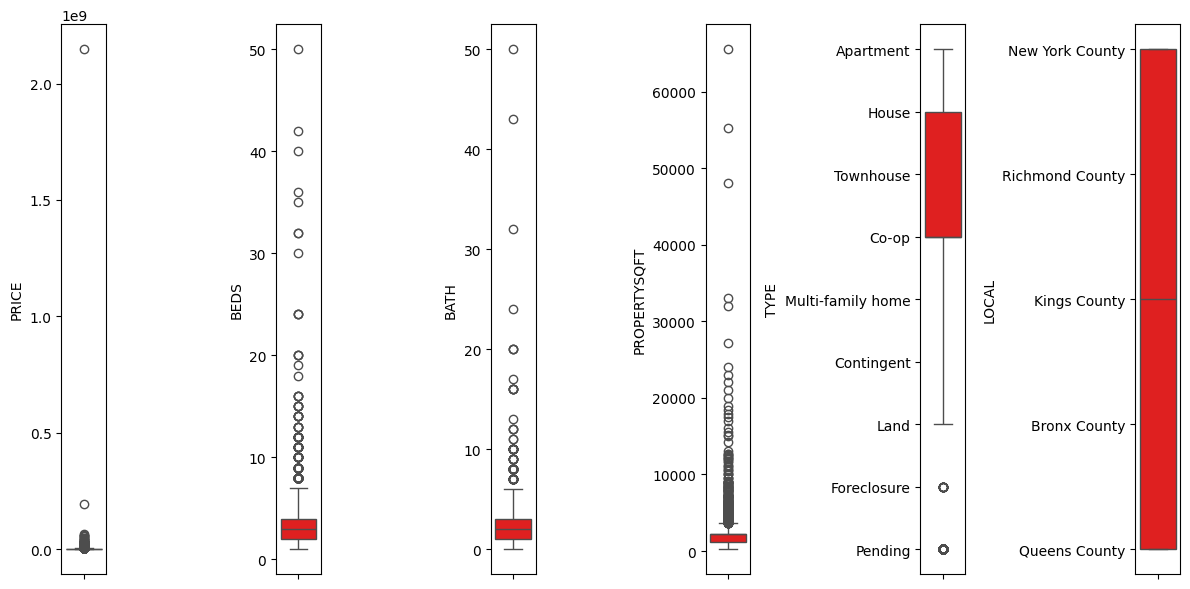

In [29]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = ['PRICE','BEDS','BATH','PROPERTYSQFT','TYPE','LOCAL']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_type[features[i]], color='red')
    plt.tight_layout()

Terdapat oulier di semua kolom

*   Drop outlier di kolom `PRICE`

####Outlier

#####IQR

In [30]:
#Mengcopy data
df_IQR = df_type.copy() #mencari data ourlier dengan metode IQR
df_zscore = df_type.copy() #mencari data ourlier dengan metode Z-Score

In [31]:
#membuat fungsi mencari oulier
def find_outliers_IQR(df):
  Q1 = np.quantile(df,.25) #hitung Q1
  Q3 = np.quantile(df,.75) #hitung Q3
  IQR = Q3 - Q1 #hitung IQR
  upper_limit = Q1+1.5*IQR #hitung limit atas
  lower_limit = Q1-1.5*IQR #hitung limit bawah
  outlier = df[((df<(lower_limit))|(df>(upper_limit)))] #rumus mencari outlier
  not_outlier = df[~((df<(Q1-1.5*IQR))|(df>(Q1+1.5*IQR)))] #rumus mencari tidak outlier
  print('Jumlah outlier\t\t: '+ str(len(outlier)))
  print('Jumlah tidak outlier\t: '+ str(len(not_outlier)))
  print('Upper limit\t\t: '+ str(upper_limit))
  print('Lower limit\t\t: '+ str(lower_limit))
  print('Percentile outlier\t: '+ str(len(outlier)/df.shape[0]*100))
  print('Max outlier\t\t: '+ str(outlier.max()))
  print('Min outlier\t\t: '+ str(outlier.min()))
  return outlier

In [32]:
find_outliers_IQR(df_IQR['PRICE'])

Jumlah outlier		: 858
Jumlah tidak outlier	: 3707
Upper limit		: 1993000.0
Lower limit		: -995000.0
Percentile outlier	: 18.795180722891565
Max outlier		: 2147483647
Min outlier		: 1995000


1        195000000
4         55000000
7         16800000
27         2250000
41         2150000
46         4250000
53         1999000
54         3250000
69        65000000
73         2880000
76        31000000
77         2550000
82        12950000
83         5750000
87         8750000
99        55000000
106        3950000
109        2695000
110        4800000
119       24800000
126       17500000
139        5000000
141       56000000
159        2750000
161        2000000
162       15000000
163        2800000
164        2600000
165        3500000
171        2400000
174        2500000
181       39995000
190       14900000
192        2499000
199        2375000
202        2250000
211       10000000
222       29200000
239        2000000
249        2580000
253        1995000
270        3000000
271        2198888
274        2649000
282        2600000
303        3950000
304     2147483647
311        3649000
325        2350000
329       12000000
337        2499000
344        5295000
345        2

Obervation:
1. Terdapat 858 outlier di kolom `PRICE`
2. Terdapat 18,79 % outlier di kolom `PRICE`, kita akan drop, walaupun persyaratan drop < 5%. karena sudah terlalu extreme.
3. Titik tertinggi $ 1.993.000

In [33]:
#drop nilai dari kolom PRICE yang lebih dari upper limit IQR
df_IQR.drop(df_IQR.index[df_IQR['PRICE'] > 1993000 ],inplace=True)

In [34]:
#check total row dan column
df_IQR.shape

(3707, 18)

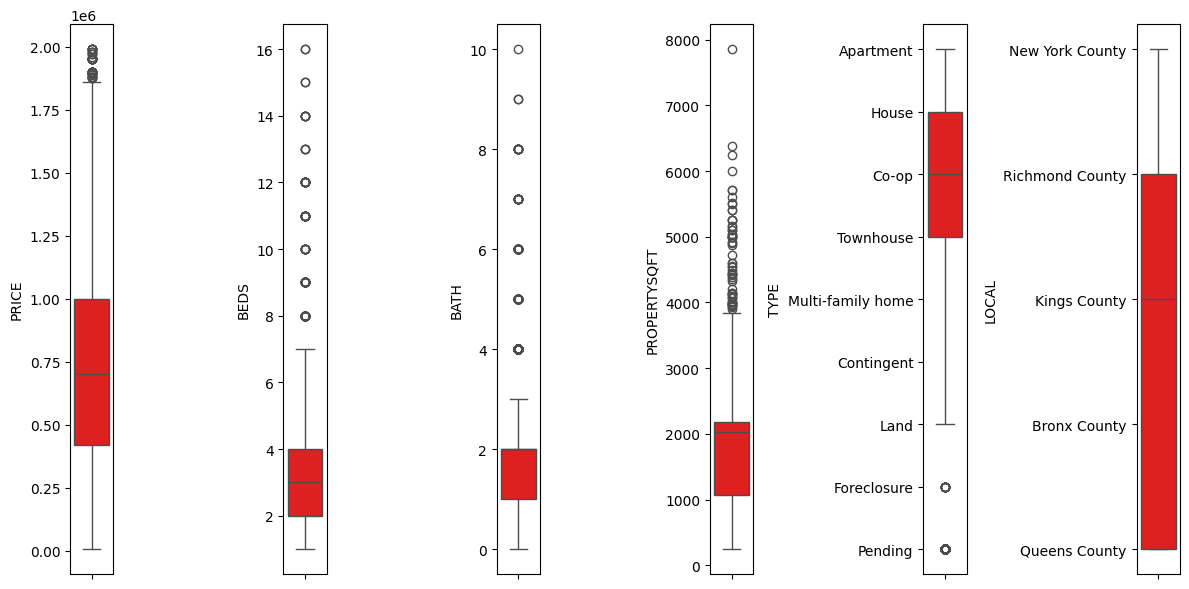

In [35]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_IQR[features[i]], color='red')
    plt.tight_layout()

Obervation:
1. semua kolom terdapat outlier, kecuali kolom `LOCAL`
2. Tidak akan di drop

In [36]:
df_IQR.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,3707,3707,3707,3707,3707,3707
mean,767014.358,3.008,1.964,1753.895,40.710,-73.935
std,431605.104,1.924,1.136,801.465,0.092,0.108
min,5800,1,0,246,40.500,-74.253
25%,419000,2,1,1064,40.631,-73.984
50%,699000,3,2,2024,40.721,-73.933
75%,999000,4,2,2184.208,40.771,-73.857
max,1990000,16,10,7854,40.913,-73.702


#####Z-Score

In [37]:
#membuat fungsi mencari oulier
def find_outliers_zscore(df,n):
  mean_zscore = df.mean() #nilai mean
  std_zscore = df.std() #std nilai
  #menghitung nilai tertinggi dari rumus zscore
  upper_limit_zscore = mean_zscore + (n* std_zscore)
  #menghitung nilai terendah dari rumus zscore
  lower_limit_zscore = mean_zscore - (n* std_zscore)
  outlier_zscore = df[(df > upper_limit_zscore)] #filter outlier
  not_outlier_zscore = df[~(df > upper_limit_zscore)] #tilde filter outlier
  print('Jumlah outlier\t\t: '+ str(len(outlier_zscore)))
  print('Jumlah tidak outlier\t: '+ str(len(not_outlier_zscore)))
  print('Upper limit\t\t: '+ str(upper_limit_zscore))
  print('Lower limit\t\t: '+ str(lower_limit_zscore))
  print('Percentile outlier\t: '+ str(len(outlier_zscore)/df.shape[0]*100))

In [38]:
find_outliers_zscore(df_zscore['PRICE'],1)

Jumlah outlier		: 14
Jumlah tidak outlier	: 4551
Upper limit		: 34528823.24947644
Lower limit		: -29761682.049914554
Percentile outlier	: 0.30668127053669225


In [39]:
df_zscore_c = df_zscore[~(df_zscore['PRICE'] > 34528823.24947644)]

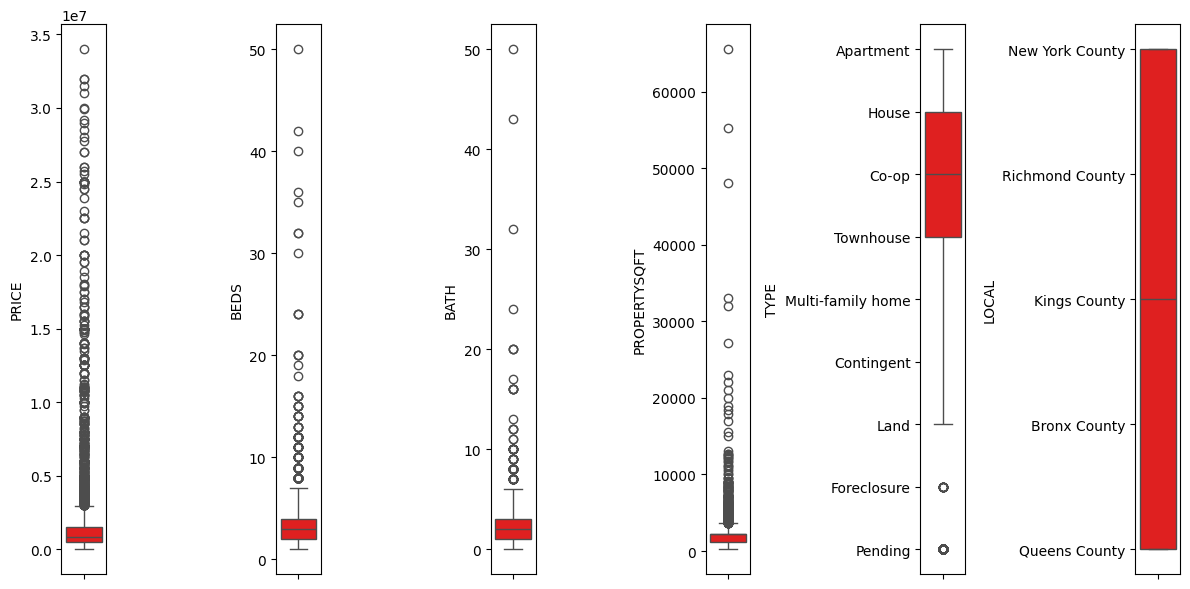

In [40]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_zscore_c[features[i]], color='red')
    plt.tight_layout()

Observations:
* Metode Z-Score tidak effisien
* lebih bagus metode IQR
* Masih terlalu extreme outlier di kolom `PRICE`

### KDE plot for knowing the distribution form

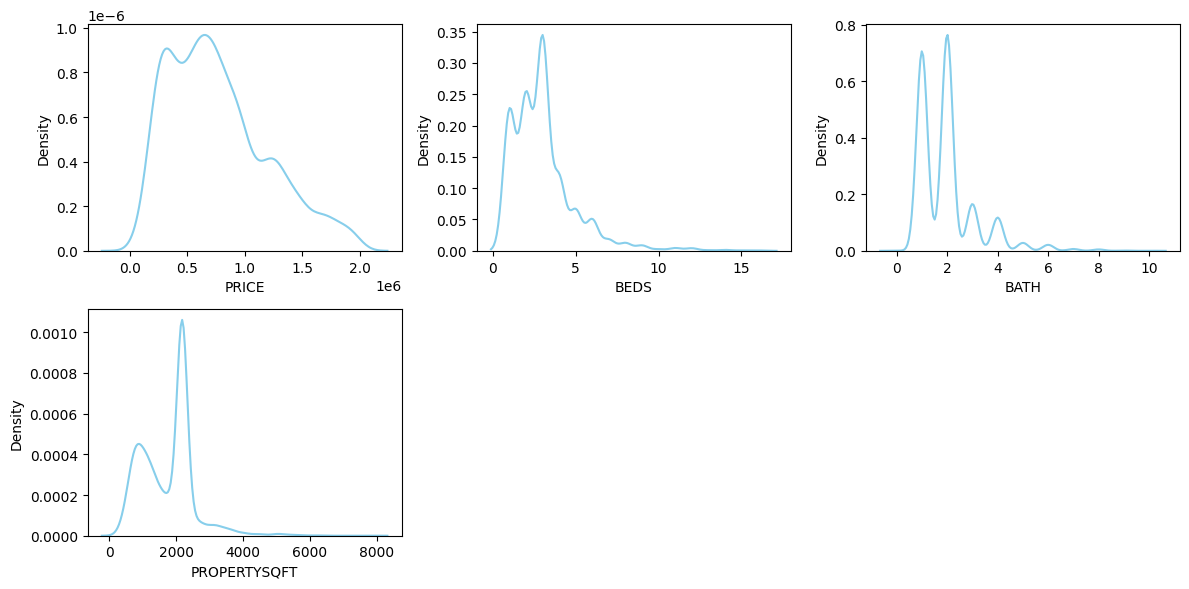

In [41]:
#data dengan metode IQR yang digunakan
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = cols
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df_IQR[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:

* Nilai tertinggi kolom `PRICE` dibawah $ 1.000.000
* Nilai tertinggi di kolom `BEDS` : 3
* Nilai tertinggi di kolom `BATH` : 2
* Nilai tertinggi di kolom `PROPERTYSQFT` : 2100 SQFT
* Semua kolom positif skewed

## Bivariate Analysis

In [42]:
#menyalin data
df_encoder = df_IQR.copy()

In [43]:
#Mengubah semua variabel menjadi bertipe numerik
from sklearn.preprocessing import LabelEncoder
df_encoder['TYPE_1'] = LabelEncoder().fit_transform(df_encoder['TYPE'])
df_encoder['LOCAL_1'] = LabelEncoder().fit_transform(df_encoder['LOCAL'])
df_encoder['BROKERTITLE_1'] = LabelEncoder().fit_transform(df_encoder['BROKERTITLE'])

In [44]:
#Menyalin data yang sudah di akan di preprocessing
df_encoder = df_encoder.loc[:,['BROKERTITLE_1','PRICE','BEDS','BATH','PROPERTYSQFT','TYPE_1','LOCAL_1']].copy()
df_encoder.head()

,BROKERTITLE_1,PRICE,BEDS,BATH,PROPERTYSQFT,TYPE_1,LOCAL_1
0,279,315000,2,2,1400,0,2
2,877,260000,4,2,2015,4,4
3,165,69000,3,1,445,0,2
5,877,690000,5,2,4004,4,1
6,290,899500,2,2,2184.208,0,2


<Axes: >

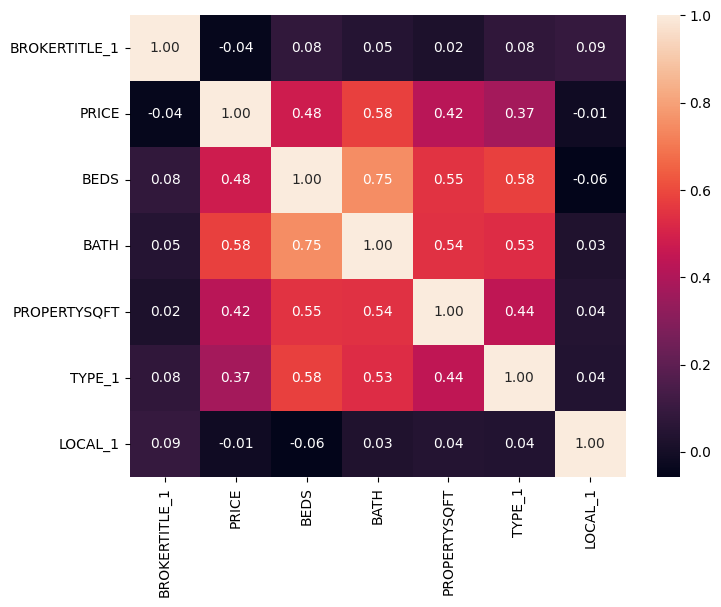

In [45]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = df_encoder.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observasi:

* `BATH` and `BEDS` are highly correlated each other


## Deep Dive
1. Analisis Harga Rata-rata Berdasarkan Tipe Rumah?
2. Analisis Harga Rata-rata Berdasarkan Lokalitas Rumah?
3. Analisis Distribusi Type rumah menurut wilayah ?
* Rata-rata luas properti tipe rumah menurut wilayah
* Rata-rata Beds dan Bath tipe rumah menurut lokasi
* Total tipe rumah menurut lokasi

In [46]:
#menyalin data
data = df_IQR.copy()
data = data.loc[:,['BROKERTITLE','TYPE','PRICE','BEDS','BATH','PROPERTYSQFT','LOCAL']]
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCAL
0,Brokered by Douglas Elliman -111 Fifth Ave,Apartment,315000,2,2,1400,New York County
2,Brokered by Sowae Corp,House,260000,4,2,2015,Richmond County
3,Brokered by COMPASS,Apartment,69000,3,1,445,New York County
5,Brokered by Sowae Corp,House,690000,5,2,4004,Kings County
6,Brokered by Douglas Elliman - 575 Madison Ave,Apartment,899500,2,2,2184.208,New York County


In [47]:
#import libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

###Analisis Harga Rata-rata Berdasarkan Tipe Rumah?


In [48]:
# Analisis Harga Rata-rata Berdasarkan Tipe Rumah?
type_price = (data
            .groupby(['TYPE'])
            .agg(mean_price_type=('PRICE','mean'),
                 median_price_type=('PRICE','median')
            )
            .reset_index()
            .sort_values('median_price_type',ascending=False)
            #.head(5)
            )
type_price


,TYPE,mean_price_type,median_price_type
6,Multi-family home,1116088.347,1080000
8,Townhouse,1004387.796,900000
4,House,878878.046,799000
7,Pending,815236.851,750000
0,Apartment,787855.792,680000
2,Contingent,671870.963,659499.500
3,Foreclosure,677165,579900
5,Land,606005.237,499500
1,Co-op,501133.249,385000


In [49]:
#visualisasi rata-rata harta tipe rumah
#line chart
fig = px.line(type_price, #data
              x=type_price['TYPE'], #data x visual line
              y=type_price['median_price_type'], #data y visual line
              color=px.Constant('Median') , #legend name
              #height = 600 , #tinggi visual
              #width = 1200 , #lebar visual
              markers=True ,#titik line
              text=type_price['median_price_type'].apply(lambda x:f'$ {x/1000:,.0f}K') ,#label median
              color_discrete_sequence=['pink'] #,#color line
              #template='presentation' #template favorite [ simple_white , presentation ]
              )
fig.update_traces(textposition='bottom center', #label line position
                  marker_size=10) #size marker
#bar chart
fig.add_bar(x=type_price['TYPE'], #data x visual bar
            y=type_price['mean_price_type'], #data y visual  bar
            name='Mean',#legend name
            text=type_price['mean_price_type'].apply(lambda x:f'$ {x/1000:,.0f}K'), #label mean
            textposition='outside', #label bar position
            marker={'color':'turquoise'} ,#color bar
            width=0.7
            )

# set title chart
fig.update_layout(title_text='Rata-rata harga tipe rumah',title_x=0.5,)
# Add figure title
fig.update_layout(
    title_text="Rata-rata harga tipe rumah" ,#title chart name
    title_x=0.5,
    template ='simple_white' ,#favorite template [simple white,presentation]
    height=800 , #tinggi chart
    width=1200 #lebar chart
)

# Set x-axis title
fig.update_xaxes(title_text="")

# Set y-axes titles
fig.update_yaxes( #fungsi update Y-axis
    title_text="", #title
    #secondary_y=False , #Y-axis false
    #showgrid=False #menghilangkan grid
    )#kurung fungsi update Y-axis
#fig.update_yaxes( #fungsi update Y-axis
    #title_text="",#title
    #secondary_y=True ,#Y-axis True
    #showgrid=False #menghilangkan grid
    #)#kurung fungsi update Y-axis

fig.show() #show visual

Observation:

* Rata-rata harga rumah type `Multi-family home` : $ 1,116,088

* Rata-rata harga rumah type `Townhouse` : $ 1,004,388

* Rata-rata harga rumah type `House` : $ 8,788,780

* Rata-rata harga rumah type `Pending	` : $ 8,152,369

* Rata-rata harga rumah type `Apartment` : $ 7,878,558

* Rata-rata harga rumah type `Contingent` : $ 6,718,710

* Rata-rata harga rumah type `Foreclosure` : $ 6,771,650

* Rata-rata harga rumah type `Land` : $ 6,060,052

* Rata-rata harga rumah type `Co-op` : $ 5,011,332

###Analisis Harga Rata-rata Berdasarkan Lokalitas Rumah?

In [50]:
# Analisis Harga Rata-rata Berdasarkan Lokalitas Rumah?
local_price = (data
            .groupby(['LOCAL'])
            .agg(mean_price_local=('PRICE','mean'),
                 median_price_local=('PRICE','median')
            )
            .reset_index()
            .sort_values('median_price_local',ascending=False)
            #.head(5)
            )
local_price


,LOCAL,mean_price_local,median_price_local
1,Kings County,857429.827,789000
2,New York County,857983.032,750000
4,Richmond County,745248.829,699000
3,Queens County,710536.328,639000
0,Bronx County,612406.813,570000


In [51]:
# Create figure with secondary y-axis
fig = make_subplots(
    specs=[[{"secondary_y": True}]] #second Y-axis
    )

# Add traces
fig.add_trace(
    go.Scatter( #fungsi Scatter (1 capital)
        x=local_price['LOCAL'], #data x visual line
        y=local_price['median_price_local'],   #data y visual line
        name="Median", #legend name
        marker={'color':'pink'} ,  #color line
        mode='lines+markers+text' ,#[lines,markers] defaults lines+markers
        text=local_price['median_price_local'].apply(lambda x:f'$ {x:,.0f}'),#label median
        textposition='bottom center', #label position
        #textfont=dict( #format text label
              #family='sans serif', #font label visual line
              #size=13, #size label visual bar
              #color='black' #color label visual bar
              #)  #kurung fungsi font
        ), #kurung fungsi bar
    secondary_y=True, #Y-axis di visual line
) #kurung fungsi add trace

#add visual bar chart
fig.add_trace(
    go.Bar( #fungsi Bar (1 capital)
          x=local_price['LOCAL'], #data x visual bar
          y=local_price['mean_price_local'], #data y visual bar
          name="Mean",  #legend name
          marker={'color':'turquoise'} ,   #color bar
          #mode='lines+markers+text', #[lines,markers] defaults lines+markers
          text= local_price['mean_price_local'].apply(lambda x:f'$ {x:,.0f}'),#label mean
          textposition='outside', #label position
          #textfont=dict( #format text label
                #family='sans serif', #font label visual bar
                #size=13, #size label visual bar
                #color='black' #color label visual bar
            #) #kurung text font
          ), #kurung fungsi bar
    secondary_y=False, #Y-axis false visual bar
) #kurung fungsi add trace

# Add figure title
fig.update_layout(
    title_text="Rata-rata harga rumah menurut lokasi " ,#title chart name
    title_x=0.5,
    template ='simple_white',#favorite template [simple white,presentation]
    height=700, #tinggi chart
    width=800 #lebar chart
)

# Set x-axis title
#fig.update_xaxes(title_text="Wilayah")

# Set y-axes titles
fig.update_yaxes( #fungsi update Y-axis
    title_text="", #title
    secondary_y=False , #Y-axis false
    #showgrid=False #menghilangkan grid
    )#kurung fungsi update Y-axis
fig.update_yaxes( #fungsi update Y-axis
    title_text="",#title
    secondary_y=True ,#Y-axis True
    showgrid=False #menghilangkan grid
    )#kurung fungsi update Y-axis

fig.show()

In [52]:
fig.write_html('Rata-rata harga rumah di wilayah')

Observation:

* Rata-rata harga rumah di wilayah `Kings County` : $ 857,429.83

* Rata-rata harga rumah di wilayah `New County` : $ 857,983.03

* Rata-rata harga rumah di wilayah `Richmond County` : $ 745,248.83

* Rata-rata harga rumah di wilayah `Queens County` : $ 710,536.33

* Rata-rata harga rumah di wilayah `Bronx County` : $ 612,406.81

###Analisis Distribusi Type rumah menurut wilayah ?

####Data Distribusi Type rumah menurut wilayah ?

In [53]:
# Analisis Harga Rata-rata Berdasarkan Lokalitas Rumah?
local_type_t = (data
            .groupby(['LOCAL','TYPE'])
            .agg(count_type=('TYPE','count'),
                 median_price=('PRICE','median'),
                 mean_price=('PRICE','mean'),
                 median_beds=('BEDS','median'),
                 mean_beds=('BEDS','mean'),
                 median_bath=('BATH','median'),
                 mean_bath=('BATH','mean'),
                 median_property=('PROPERTYSQFT','median'),
                 mean_property=('PROPERTYSQFT','mean'),
            )
            .reset_index()
            .sort_values('count_type',ascending=False)
            #.head(5)
            )
local_type_t


,LOCAL,TYPE,count_type,median_price,mean_price,median_beds,mean_beds,median_bath,mean_bath,median_property,mean_property
27,Queens County,Co-op,434,309499.500,355983.452,2,1.793,1,1.210,2184.208,1691.948
18,New York County,Co-op,418,650000,769261.813,2,1.935,1,1.318,2184.208,1793.752
29,Queens County,House,268,868000,936336.459,3,3.586,2,2.299,2184.208,1977.558
38,Richmond County,House,231,748888,789951.190,3,3.303,2,2.333,1500,1760.226
9,Kings County,Co-op,222,350000,435368.302,2,1.721,1,1.135,900,1159.539
12,Kings County,House,222,877500,969010.905,3,3.577,2,2.198,1848,1840.627
14,Kings County,Multi-family home,191,1188000,1184443.497,5,5.754,3,3.309,2184.208,2479.279
8,Kings County,Apartment,186,725000,839438.613,2,2.134,2,1.613,1021.500,1125.836
17,New York County,Apartment,180,950000,1009019.317,2,1.983,1,1.506,1003,1161.389
31,Queens County,Multi-family home,179,1188000,1180388.447,5,5.693,3,3.508,2184.208,2373.917


In [54]:
#filter data yang sudah di group by LOCAL
local_type_ny=local_type_t[local_type_t['LOCAL'] == 'New York County'].sort_values('TYPE',ascending=False)
local_type_r=local_type_t[local_type_t['LOCAL'] == 'Richmond County'].sort_values('TYPE',ascending=False)
local_type_k=local_type_t[local_type_t['LOCAL'] == 'Kings County'].sort_values('TYPE',ascending=False)
local_type_q=local_type_t[local_type_t['LOCAL'] == 'Queens County'].sort_values('TYPE',ascending=False)
local_type_b=local_type_t[local_type_t['LOCAL'] == 'Bronx County'].sort_values('TYPE',ascending=False)

####Rata-rata luas properti tipe rumah menurut wilayah

In [55]:
fig = px.bar(local_type_t,x=local_type_t.TYPE,y=local_type_t.mean_property,
             color='LOCAL',
             text=local_type_t.mean_property.apply(lambda x:f'{x:,.0f} sqft'),
             #color_discrete_map={
                 #'New York County':'aquamarine',
                #'Richmond County':'turquoise',
                 #'Queens County':'aqua',
                 #'Kings County':'teal',
                 #'Bronx County':'teal',
             #}
             )
fig.update_traces(width=0.75)
fig.update_layout(
    title_text='Rata-rata luas properti tipe rumah menurut wilayah',
    title_x=0.5,
    template='simple_white',
    yaxis_tickformat = '',
    )
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='')
fig.show()

####Rata-rata Beds dan Bath tipe rumah menurut lokasi

In [56]:
fig = make_subplots(
    rows = 5, #jumlah row subplots
    cols = 2, #jumlah column subplots
    specs = [
        [{'type':'xy'},{'type':'xy'}],
        [{'type':'xy'},{'type':'xy'}],
        [{'type':'xy'},{'type':'xy'}],
        [{'type':'xy'},{'type':'xy'}],
        [{'type':'xy'},{'type':'xy'}],
        ] ,#type xy [bar chart], type domain [pie chart]
    subplot_titles=['Beds New York County','Bath New York County',
                    'Beds Richmond County','Bath Richmond County',
                    'Beds Kings County','Bath Kings County',
                    'Beds Queens County','Bath Queens County',
                    'Beds Bronx County','Bath Bronx County',
                    ]
)
#add set trace
fig.add_trace(go.Bar(x=local_type_ny['TYPE'],y=local_type_ny['median_beds'],text=local_type_ny['median_beds']),row=1,col=1) #row 1 col 1
fig.add_trace(go.Bar(x=local_type_ny['TYPE'],y=local_type_ny['median_bath'],text=local_type_ny['median_bath']),row=1,col=2) #row 1 col2
fig.add_trace(go.Bar(x=local_type_r['TYPE'],y=local_type_r['median_beds'],text=local_type_r['median_beds']),row=2,col=1) #row 2 col 1
fig.add_trace(go.Bar(x=local_type_r['TYPE'],y=local_type_r['median_bath'],text=local_type_r['median_bath']),row=2,col=2) #row 2 col 2
fig.add_trace(go.Bar(x=local_type_k['TYPE'],y=local_type_k['median_beds'],text=local_type_k['median_beds']),row=3,col=1) #row 3 col 1
fig.add_trace(go.Bar(x=local_type_k['TYPE'],y=local_type_k['median_bath'],text=local_type_k['median_bath']),row=3,col=2) #row 3 col 2
fig.add_trace(go.Bar(x=local_type_q['TYPE'],y=local_type_q['median_beds'],text=local_type_q['median_beds']),row=4,col=1) #row 4 col 1
fig.add_trace(go.Bar(x=local_type_q['TYPE'],y=local_type_q['median_bath'],text=local_type_q['median_bath']),row=4,col=2) #row 4 col 2
fig.add_trace(go.Bar(x=local_type_b['TYPE'],y=local_type_b['median_beds'],text=local_type_b['median_beds']),row=5,col=1) #row 5 col 1
fig.add_trace(go.Bar(x=local_type_b['TYPE'],y=local_type_b['median_bath'],text=local_type_b['median_bath']),row=5,col=2) #row 5 col 2
#fig.add_trace(go.Pie(labels=local_type_t['LOCAL'].value_counts().index,values=local_type_t['count_type'].value_counts().values),row=1,col=2)

# Add figure title
fig.update_layout(
    title_text="Rata-rata Beds dan Bath tipe rumah menurut lokasi" ,#title chart name
    title_x=0.5,
    template ='simple_white',#favorite template [simple white,presentation]
    height=1800, #tinggi chart
    width=1500 ,#lebar chart
    showlegend = False
)
fig.update_annotations(font_size=24)
# Set x-axis title
fig.update_xaxes(title_text="")

# Set y-axes titles
fig.update_yaxes( #fungsi update Y-axis
    title_text="", #title
    #secondary_y=False , #Y-axis false
    #showgrid=False #menghilangkan grid
    )#kurung fungsi update Y-axis

fig.show()

####Total tipe rumah menurut lokasi

In [57]:

fig = px.bar(local_type_t,x='TYPE',y='count_type',color='LOCAL',barmode='group',hover_data=['mean_property','mean_price','mean_beds','mean_bath'],text_auto=True)

fig.update_traces(textposition='outside', #label line position

                  #textfont=dict(size=12)
                  #marker_size=10
                  ) #size marker
#fig.update_annotations(font_size=24)
fig.update_layout(title_text='Total tipe rumah menurut lokasi',
                  title_x=0.5,
                  template='simple_white',
                  width=1200,
                  )
# Set x-axis title
fig.update_xaxes(title_text="")

# Set y-axes titles
fig.update_yaxes( #fungsi update Y-axis
    title_text="", #title
    #secondary_y=False , #Y-axis false
    #showgrid=False #menghilangkan grid
    )#kurung fungsi update Y-axis
fig.show()

#Machine Learning

In [58]:
#Recheck data
df_encoder.head()

,BROKERTITLE_1,PRICE,BEDS,BATH,PROPERTYSQFT,TYPE_1,LOCAL_1
0,279,315000,2,2,1400,0,2
2,877,260000,4,2,2015,4,4
3,165,69000,3,1,445,0,2
5,877,690000,5,2,4004,4,1
6,290,899500,2,2,2184.208,0,2


## Multiple Regression

In [59]:
# split train test
from sklearn.model_selection import train_test_split

feature = df_encoder.drop(columns='PRICE')
target = df_encoder[['PRICE']]

feature_house_train, feature_house_test, target_house_train, target_house_test = train_test_split(feature, target, test_size=0.20, random_state=42)

### Multicollinearity Study

In [60]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_house_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,BROKERTITLE_1,1.021
2,BEDS,2.758
3,BATH,2.506
4,PROPERTYSQFT,1.553
5,TYPE_1,1.614
6,LOCAL_1,1.038


Observasi:

* Tidak ada vif_score yang tinggi

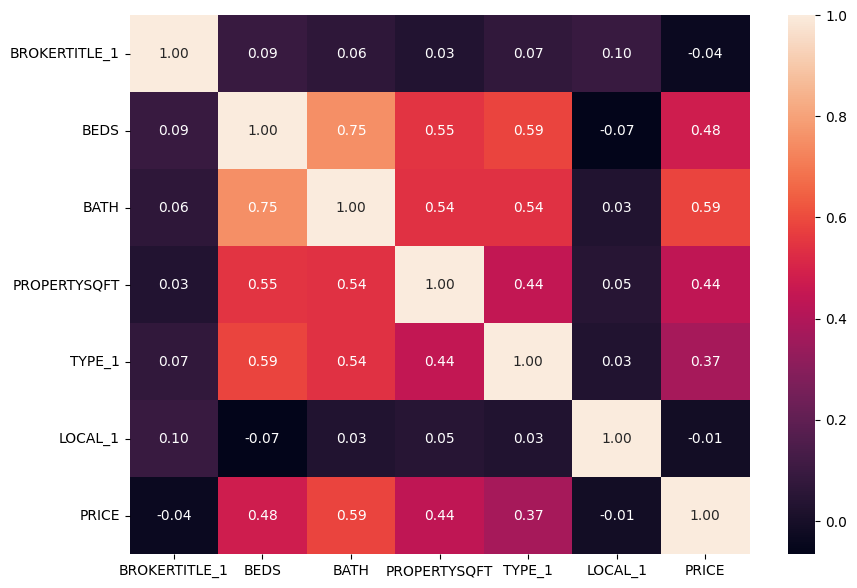

In [61]:
# heatmap correlation
house_train = pd.concat([feature_house_train, target_house_train], axis=1)
corr = house_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

### Model Training

In [62]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_house_train = feature_house_train.to_numpy()
y_house_train = target_house_train.to_numpy()
y_house_train = y_house_train.reshape(len(y_house_train,))

multi_reg.fit(X_house_train, y_house_train)

LinearRegression()

In [63]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_house_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,312550.262
1,BROKERTITLE_1,-111.632
2,BEDS,3673.589
3,BATH,176717.078
4,PROPERTYSQFT,82.484
5,TYPE_1,8852.325
6,LOCAL_1,-9376.554


### Model Diagnostic

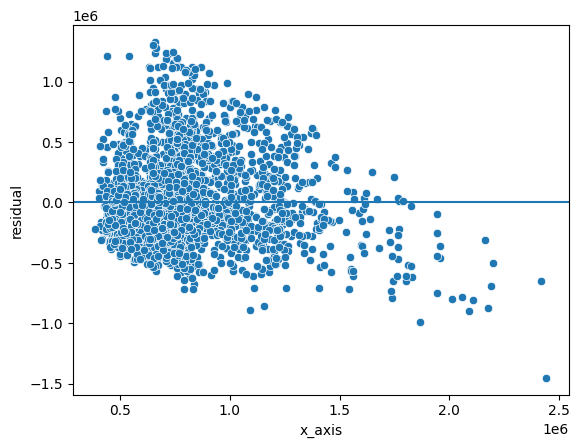

In [64]:
# calculate residuals
y_predict_train = multi_reg.predict(X_house_train)
residual = y_house_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


Asumsi:
1. Terpenuhi terdapat garis lurus.
2. Tidak terpenuhi tidak menyebar
3. Tidak terpenuho sedikit  mengarah ke bawah

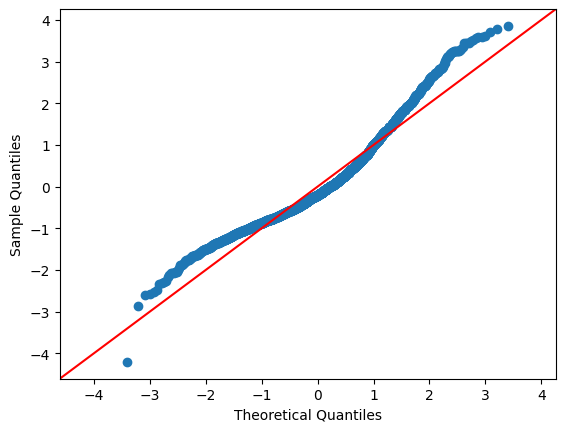

In [65]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')

plt.show()

Asumsi ke empat sedikit skewed

### Model Evaluation

#### Training Error

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_house_train, y_predict_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_house_train, y_predict_train))))

R-squared for training data is 0.37171644179961627
RMSE for training data is 345502.0859903937


R-square tidak lebih dari 50 % atau model tidak bisa di pakai

#### Testing Error

In [67]:
# prepare prediction result on test data
X_house_test = feature_house_test.to_numpy()
y_predict_test = multi_reg.predict(X_house_test)

# ground truth target
y_house_test = target_house_test.to_numpy()
y_house_test = y_house_test.reshape(len(y_house_test),)


In [68]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_house_test, y_predict_test))))

RMSE for testing data is 342571.1577819859


## Feature Engineering


In [69]:
# Transform categorical data agar bisa diinput ke machine learning
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [70]:
df_hot_encoder = df_IQR.copy()
df_hot_encoder = df_hot_encoder.loc[:,['TYPE','LOCAL','PRICE','BEDS','BATH','PROPERTYSQFT']]
df_hot_encoder.head()

,TYPE,LOCAL,PRICE,BEDS,BATH,PROPERTYSQFT
0,Apartment,New York County,315000,2,2,1400
2,House,Richmond County,260000,4,2,2015
3,Apartment,New York County,69000,3,1,445
5,House,Kings County,690000,5,2,4004
6,Apartment,New York County,899500,2,2,2184.208


In [71]:
# One hot encoder dengan parameter drop='first' untuk menghindari multicollinearity
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first') # rumus one hot encoder
encoded_columns = one_hot_encoder.fit_transform(df_hot_encoder.loc[:,['TYPE','LOCAL']]) # kolom yang di encoder
df_one_hot_encoder = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(df_hot_encoder.columns[0:2])) # beri nama kolom sesuai fit_transform
df_one_hot_encoder = pd.concat([df_hot_encoder.loc[:,['PRICE','BEDS','BATH','PROPERTYSQFT']], df_one_hot_encoder], axis=1) # menggabungkan kolom encoding dengan kolom normal
df_one_hot_encoder.sample(5)

,PRICE,BEDS,BATH,PROPERTYSQFT,TYPE_Co-op,TYPE_Contingent,TYPE_Foreclosure,TYPE_House,TYPE_Land,TYPE_Multi-family home,TYPE_Pending,TYPE_Townhouse,LOCAL_Kings County,LOCAL_New York County,LOCAL_Queens County,LOCAL_Richmond County
352,749000,4,1,1040,0,1,0,0,0,0,0,0,0,0,0,1
4672,1399995,6,5,2184.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1733,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,1,0
4271,325000,1,1,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4597,369000,1,1,2184.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df_one_hot_encoder.shape

(4508, 16)

In [73]:
# df_one_hot_encoder.dropna(inplace=True)
# df_one_hot_encoder.reset_index(inplace=True)

In [74]:
df_one_hot_encoder.shape

(4508, 16)

## Training Model

In [75]:
# Import Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #Random Forest

In [76]:
# Pisahkan X (dataframe) dan y (series)
df_one_hot_encoder = df_one_hot_encoder.dropna()
X = df_one_hot_encoder.drop(['TYPE_Multi-family home'], axis=1)
y = df_one_hot_encoder['TYPE_Multi-family home']

In [77]:
# Pisahkan X dan y menjadi data train (X_train dan y_train) dan data test (X_test dan y_test)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# display the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2324, 15)
(582, 15)
(2324,)
(582,)


In [78]:
# # Scale
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [79]:
# # Try SMOTE
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_resampled)
# X_test_scaled = scaler.transform(X_test)
# print(X_train_scaled.shape)
# print(X_test_scaled.shape)

In [80]:
# Try SMOTEENN
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(1671, 15)
(582, 15)


In [81]:
# # Cross Validation
# from sklearn.model_selection import cross_val_score

# ranfor = RandomForestClassifier()
# cv_scores = cross_val_score(ranfor, X_train_scaled, y_train, cv=5, scoring='accuracy')

# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", cv_scores.mean())

### KNN

In [82]:
# Training menggunakan KNN
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

### Logistic Regression

> Indented block



In [83]:
# Training menggunakan logistic regression
logistic_classifier = LogisticRegression(max_iter=1000)
logistic_classifier.fit(X_train, y_train)
logistic_predictions = logistic_classifier.predict(X_test)

### Decision Tree

In [84]:
# Training menggunakan decision tree
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)
tree_predictions = tree_classifier.predict(X_test)

## Evaluation

In [85]:
# Evaluasi menggunakan accuracy
from sklearn.metrics import accuracy_score

print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_predictions))

K-Nearest Neighbors Accuracy: 0.8350515463917526
Logistic Regression Accuracy: 0.8419243986254296
Decision Tree Accuracy: 0.8831615120274914


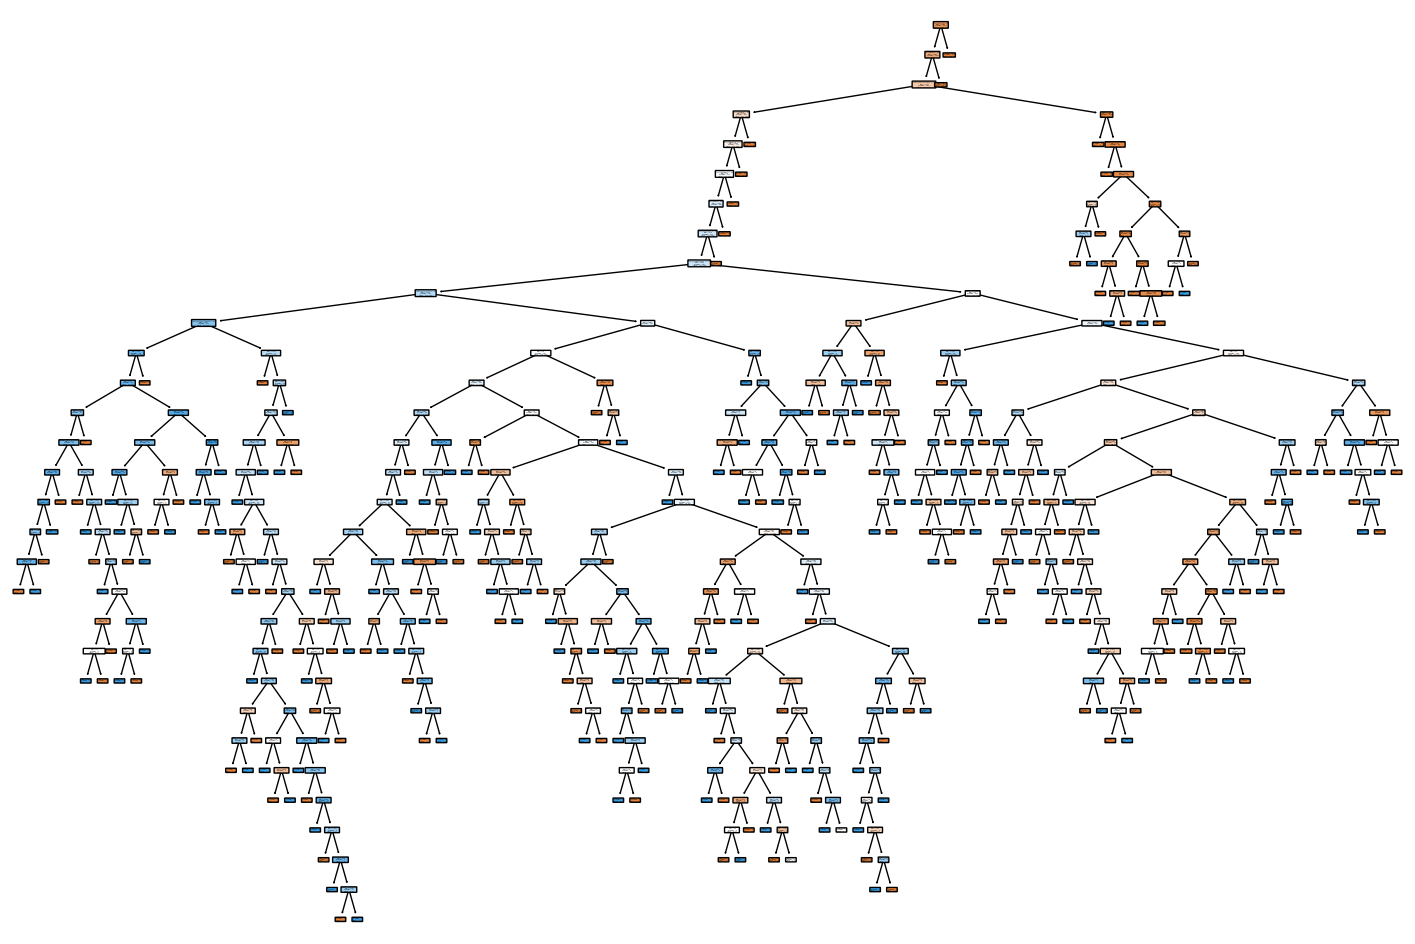

In [86]:
# Menggambar decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 12))
plot_tree(tree_classifier, feature_names=X.columns, filled=True, rounded=True)
#plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

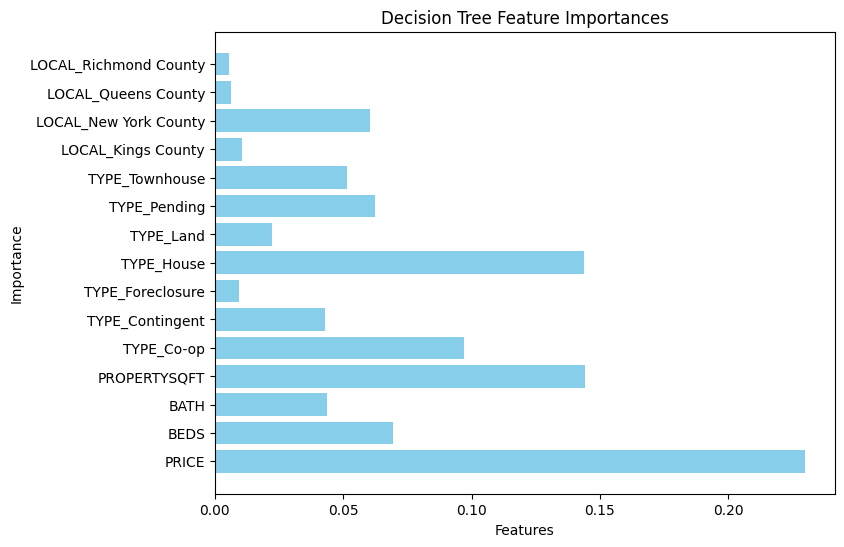

In [87]:
# Generate feature importances dari decision tree
feature_importances = tree_classifier.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

In [88]:
# # ranfor evaluation
# ranfor = RandomForestClassifier()
# ranfor.fit(X_train_scaled, y_train)
# y_test_pred = ranfor.predict(X_test_scaled)

In [89]:
# from sklearn.metrics import confusion_matrix, classification_report

# print(confusion_matrix(y_test, y_test_pred))
# print(classification_report(y_test, y_test_pred))

In [90]:
# from sklearn.metrics import roc_auc_score, roc_curve

# y_probabilities = ranfor.predict_proba(X_test_scaled)[:, 1]
# roc_auc = roc_auc_score(y_test, y_probabilities)
# print("AUC-ROC Score:", roc_auc)

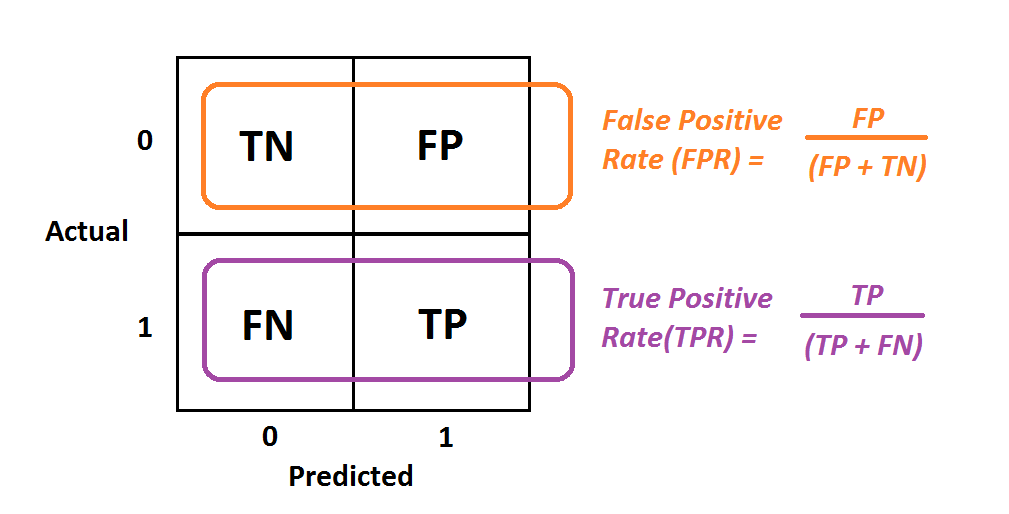

In [91]:
# fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

#### Try SMOTE

In [92]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_resampled)
# X_test_scaled = scaler.transform(X_test)

In [93]:
# ranfor = RandomForestClassifier()
# ranfor.fit(X_train_scaled, y_resampled)
# y_test_pred = ranfor.predict(X_test_scaled)
# print(classification_report(y_test, y_test_pred))

#### Try SMOTEENN

In [94]:
# from imblearn.combine import SMOTEENN

# smoteenn = SMOTEENN(random_state=42)
# X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_resampled)
# X_test_scaled = scaler.transform(X_test)

In [95]:
# ranfor = RandomForestClassifier()
# ranfor.fit(X_train_scaled, y_resampled)
# y_test_pred = ranfor.predict(X_test_scaled)
# print(classification_report(y_test, y_test_pred))